# Lab 4

In [13]:
%matplotlib inline
import pandas as pd
from plotnine import *

## Step 1:

In [14]:
df = pd.read_csv("CSV Files/cancergenes.txt", sep='\t')
df

,NAME,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16
0,"100015 ESTs, Moderately similar to RDHUD dihy...",-0.74,-0.20,0.30,-0.06,0.22,-0.32,-0.38,-0.12,0.04,0.74,0.19,-0.51,-0.06,0.40,-0.40,0.13
1,100040 POLRMT polymerase (RNA) mitochondrial (...,0.19,0.16,0.40,0.66,1.02,0.03,0.47,-0.44,-0.62,-0.25,-0.67,-0.35,0.45,-0.36,-1.19,0.31
2,100044 JUNB jun B proto-oncogene Hs.198951 T99...,0.34,0.46,0.72,2.46,0.84,1.58,0.48,1.44,-1.79,-0.40,0.19,-0.39,-0.97,-0.85,-2.06,-0.12
3,100069 KIAA0179 KIAA0179 protein Hs.152629 AA6...,-0.15,0.71,0.13,0.14,-0.42,-0.19,1.05,-0.14,0.63,-0.60,1.18,0.84,1.03,0.67,0.81,1.48
4,100072 NFS1 NFS1 nitrogen fixation 1 (S. cerev...,-0.20,0.63,1.06,-0.16,-0.20,-0.22,-0.01,0.27,-0.09,0.11,-0.24,0.04,0.28,-0.41,0.47,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,99906 SERPINE1 serine (or cysteine) proteinase...,0.00,0.00,1.06,1.63,-0.27,1.93,-1.08,1.27,0.55,-0.23,-0.49,-0.53,-1.39,-0.48,0.06,-0.63
974,99931 EML4 echinoderm microtubule associated p...,1.02,0.58,0.67,0.48,0.90,0.15,0.54,1.24,1.13,1.27,1.04,0.77,0.98,1.46,0.50,1.80
975,99935 Homo sapiens mRNA; cDNA DKFZp586I1420 (...,-0.16,0.21,0.09,-0.61,0.44,0.32,-0.46,0.13,-0.13,0.07,0.41,0.70,0.44,-0.22,1.09,0.40
976,99977 ESTs Hs.356487 AA131466,-0.38,1.09,1.55,0.62,0.25,1.26,0.49,0.64,-0.55,-1.29,-0.80,-0.76,-0.54,0.28,-0.23,-1.21


## Step 2:

In [15]:
features = df.columns[1:]
df_melted = pd.melt(df, id_vars=["NAME"], value_vars=features, value_name="Value", var_name="Sample")
df_melted

,NAME,Sample,Value
0,"100015 ESTs, Moderately similar to RDHUD dihy...",Sample1,-0.74
1,100040 POLRMT polymerase (RNA) mitochondrial (...,Sample1,0.19
2,100044 JUNB jun B proto-oncogene Hs.198951 T99...,Sample1,0.34
3,100069 KIAA0179 KIAA0179 protein Hs.152629 AA6...,Sample1,-0.15
4,100072 NFS1 NFS1 nitrogen fixation 1 (S. cerev...,Sample1,-0.20
...,...,...,...
15643,99906 SERPINE1 serine (or cysteine) proteinase...,Sample16,-0.63
15644,99931 EML4 echinoderm microtubule associated p...,Sample16,1.80
15645,99935 Homo sapiens mRNA; cDNA DKFZp586I1420 (...,Sample16,0.40
15646,99977 ESTs Hs.356487 AA131466,Sample16,-1.21


In [16]:
df_melted["NAME"] = pd.Categorical(df_melted["NAME"], df_melted["NAME"].unique())
df_melted

,NAME,Sample,Value
0,"100015 ESTs, Moderately similar to RDHUD dihy...",Sample1,-0.74
1,100040 POLRMT polymerase (RNA) mitochondrial (...,Sample1,0.19
2,100044 JUNB jun B proto-oncogene Hs.198951 T99...,Sample1,0.34
3,100069 KIAA0179 KIAA0179 protein Hs.152629 AA6...,Sample1,-0.15
4,100072 NFS1 NFS1 nitrogen fixation 1 (S. cerev...,Sample1,-0.20
...,...,...,...
15643,99906 SERPINE1 serine (or cysteine) proteinase...,Sample16,-0.63
15644,99931 EML4 echinoderm microtubule associated p...,Sample16,1.80
15645,99935 Homo sapiens mRNA; cDNA DKFZp586I1420 (...,Sample16,0.40
15646,99977 ESTs Hs.356487 AA131466,Sample16,-1.21


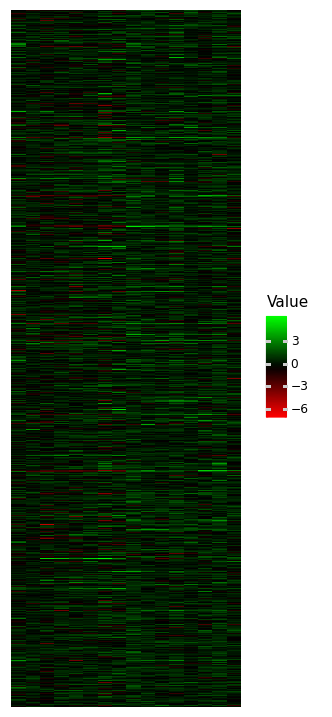

<ggplot: (148322534873)>

In [17]:
theme_set(theme_void())
ggplot(df_melted, aes(x="Sample", y="NAME", fill="Value")) \
+ geom_tile() \
+ theme(figure_size=(3, 10), aspect_ratio=3.0, legend_key_size=10.0, legend_key_width =10.0)\
+ scale_fill_gradientn(colors=["#ff0000", "#000000", "#00ff00"])

Conclusion: There isn't any particular pattern that I can parse from this data in particular.

## Step 3:

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
km = KMeans(n_clusters = 2, init="random",
           n_init = 10, max_iter=300,
           tol=1e-04, random_state=0)

In [20]:
x = df.loc[:, features].values
x

array([[-0.74, -0.2 ,  0.3 , ...,  0.4 , -0.4 ,  0.13],
       [ 0.19,  0.16,  0.4 , ..., -0.36, -1.19,  0.31],
       [ 0.34,  0.46,  0.72, ..., -0.85, -2.06, -0.12],
       ...,
       [-0.16,  0.21,  0.09, ..., -0.22,  1.09,  0.4 ],
       [-0.38,  1.09,  1.55, ...,  0.28, -0.23, -1.21],
       [-0.83, -0.2 ,  0.7 , ..., -0.4 , -0.11,  0.24]])

In [21]:
x = StandardScaler().fit_transform(x)
x

array([[-0.99106435, -0.9629253 , -0.1011026 , ...,  0.25079885,
        -0.57630091, -0.15370939],
       [ 0.13192543, -0.45730012,  0.05498002, ..., -0.88227781,
        -1.29333143,  0.03490765],
       [ 0.31305282, -0.0359458 ,  0.55444443, ..., -1.61281408,
        -2.08297263, -0.41567749],
       ...,
       [-0.29070513, -0.3870744 , -0.42887611, ..., -0.67355316,
         0.7760731 ,  0.12921617],
       [-0.55635863,  0.84889826,  1.84993022, ...,  0.07189201,
        -0.4220032 , -1.55785844],
       [-1.09974078, -0.9629253 ,  0.5232279 , ..., -0.94191342,
        -0.31308718, -0.03844342]])

In [22]:
result = km.fit(x)
result.cluster_centers_
result.labels_

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [23]:
fitted_df = df.drop(columns="NAME")
result = km.fit(fitted_df.values)
df["cluster"] = pd.Series(result.labels_).astype("str")
df["cluster"] = pd.Categorical(df["cluster"], )

cluster_0 = df.loc[df["cluster"] == "0"]
cluster_1 = df.loc[df["cluster"] == "1"]
list_0 = cluster_0["NAME"].to_list()
list_1 = cluster_1["NAME"].to_list()
list_0.extend(list_1)

df_melted["NAME"] = pd.Categorical(df_melted["NAME"], categories = list_0)

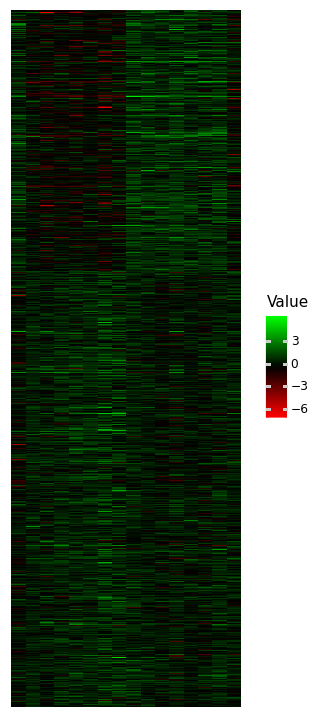

<ggplot: (148323076783)>

In [24]:
theme_set(theme_void())
ggplot(df_melted, aes(x="Sample", y="NAME", fill="Value")) \
+ geom_tile() \
+ theme(figure_size=(3, 10), aspect_ratio=3.0, legend_key_size=10.0, legend_key_width =10.0)\
+ scale_fill_gradientn(colors=["#ff0000", "#000000", "#00ff00"])

Conclusion: When reorganizing the set of data using K-means it shows one groupone has abnormally low expression of about a third of genes looked at in the study, while higher than usual expression for them most of the rest. Where as the other group shows that for about two-thirds of the genes it has relatively low or no expression of the gene and for a third of the genes it has high expression. In comparing this map to the ones presented in the original paper, it seems to show a similar pattern to theirs in that a clear distinction can be made between test subjects who express a group of genes at abnormally high rates, and those who express genes in flipped order. 

## Step 4:

In [28]:
df2 = pd.read_csv("CSV Files/hgu133a_rma_okFiles_080619_MAGETAB-fixed.csv")
df2

,Hybridization REF,CompositeElement REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1102960533.CEL,RMA,7.843903,6.655317,6.561170,8.428770,4.331943,9.997028,5.865304,5.157511,...,4.703504,5.688980,12.374575,12.536555,5.403150,4.713231,4.047919,4.012319,4.277983,4.257308
1,1102960569.CEL,RMA,7.607922,6.582941,6.586381,8.679448,4.246734,9.971347,5.988573,5.215961,...,4.882721,5.695677,13.052185,13.082561,5.549325,4.823984,4.118542,3.867210,4.294047,4.130957
2,1102960602.CEL,RMA,7.774873,6.988180,6.712788,8.601999,4.361971,9.590921,6.206851,5.149278,...,5.022235,6.389155,12.908104,13.104754,5.436899,4.666710,3.951301,3.887689,4.335456,4.252916
3,1102960632.CEL,RMA,7.345778,6.695275,6.516051,8.340240,4.375771,9.708060,5.781350,5.041516,...,4.928157,6.226759,12.558607,12.775968,5.445584,4.691382,4.051777,3.905536,4.295104,4.160429
4,1102960664.CEL,RMA,7.676319,6.725969,7.034441,8.704646,4.374744,9.712844,5.984591,5.088845,...,4.896056,5.650863,12.848972,13.062736,5.541452,4.727372,3.908556,3.937984,4.141420,4.125748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,GSM9814.CEL,RMA,8.384376,7.020442,6.823220,9.115296,4.873902,8.896327,6.236415,5.209986,...,5.295300,6.300271,13.330022,13.368244,5.681590,4.823509,4.344806,3.918684,4.319664,4.114120
5368,GSM9817.CEL,RMA,8.008073,7.012846,7.756190,8.989796,4.524288,9.075289,6.095048,5.125835,...,5.465700,5.947201,13.381901,13.565438,5.672889,4.688320,4.368711,3.927416,4.246305,4.152228
5369,GSM9835.CEL,RMA,8.058827,6.846252,10.899927,8.918906,4.616359,7.848606,5.798793,5.365443,...,5.059551,5.983592,13.685627,13.582194,5.447459,4.686981,4.332984,3.868145,4.283405,4.356133
5370,GSM9849.CEL,RMA,8.127216,7.217631,7.480647,8.823816,4.420449,8.373651,5.974835,5.157333,...,5.750378,6.587478,13.735901,13.532105,5.778378,4.641064,4.148315,3.930341,4.224848,4.176509


In [68]:
features = df2.columns[2:]
features 

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Hs28SrRNA-5_at', 'AFFX-r2-Hs28SrRNA-M_at',
       'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at',
       'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'],
      dtype='object', length=22283)

In [69]:
x = df2.loc[:, features].values
x

array([[ 7.843903  ,  6.655317  ,  6.56117   , ...,  4.01231892,
         4.27798262,  4.2573079 ],
       [ 7.607922  ,  6.582941  ,  6.5863814 , ...,  3.86721012,
         4.29404664,  4.13095676],
       [ 7.774873  ,  6.9881797 ,  6.7127876 , ...,  3.88768949,
         4.33545608,  4.25291621],
       ...,
       [ 8.058827  ,  6.846252  , 10.899927  , ...,  3.86814467,
         4.28340454,  4.35613287],
       [ 8.127216  ,  7.2176313 ,  7.480647  , ...,  3.93034099,
         4.22484843,  4.1765092 ],
       [ 8.198582  ,  7.430561  ,  7.08103   , ...,  4.05834068,
         4.37654102,  4.09900815]])

In [70]:
x = StandardScaler().fit_transform(x)
x

array([[-1.09162955e+00, -6.26281100e-01, -7.87412832e-01, ...,
        -8.01159329e-02, -1.65129096e-01, -9.19982246e-02],
       [-1.32964705e+00, -7.33223612e-01, -7.42040476e-01, ...,
        -2.02633706e-01, -1.49195481e-01, -2.06498264e-01],
       [-1.16125527e+00, -1.34444395e-01, -5.14550252e-01, ...,
        -1.85342633e-01, -1.08122187e-01, -9.59779976e-02],
       ...,
       [-8.74850759e-01, -3.44156244e-01,  7.02094469e+00, ...,
        -2.01844650e-01, -1.59751192e-01, -2.44254856e-03],
       [-8.05871564e-01,  2.04592447e-01,  8.67348001e-01, ...,
        -1.49331265e-01, -2.17831957e-01, -1.65218411e-01],
       [-7.33889678e-01,  5.19216591e-01,  1.48166815e-01, ...,
        -4.12589964e-02, -6.73707598e-02, -2.35450255e-01]])

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [72]:
pcadf = pd.DataFrame(data= principal_components,columns=["PCA 1", "PCA 2"])
pcadf

,PCA 1,PCA 2
0,-9.770208,-70.797523
1,-6.988705,-70.131551
2,-9.296513,-73.914392
3,-36.496618,-72.812598
4,-6.257372,-68.597441
...,...,...
5367,62.679082,-56.832235
5368,68.868930,-54.405652
5369,52.083511,-54.362749
5370,47.748028,-73.800848


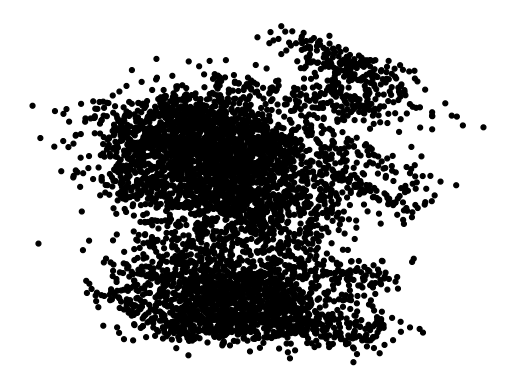

<ggplot: (149084791688)>

In [78]:
ggplot(pcadf, aes(x="PCA 1", y="PCA 2")) + \
geom_point()

Conclusion: Looking at this graph, there seems two clusters of data forming, which have a consistent amount of variance within them. Suggesting that within this data set there is a some unknown correlation surrounding this data.

## Step 5:

In [80]:
cells = pd.read_csv(r"CSV Files/E-MTAB-62.sdrf.txt", sep='\t')
cells

,Source Name,Characteristics[OperatorVariation],Characteristics[DataSource],Characteristics[4 meta-groups],Characteristics[15 meta-groups],Characteristics[369 groups],Characteristics[groups with 10 and more replicates],Characteristics[Blood/NonBlood meta-groups],Characteristics[Organism],Characteristics[OrganismPart],...,Protocol REF,Derived Array Data Matrix File,Comment [Derived ArrayExpress FTP file],Factor Value[4 meta-groups],Factor Value[15 meta-groups],Factor Value[369 groups],Factor Value[Blood-NonBlood meta-groups],Factor Value[6 meta-groups],Factor Value[4 groups from blood to incompletely diff],Factor Value[96 groups]
0,GSM23227.CEL,"Richard,Steven,Mitchell",GSE1410,cell line,non neoplastic cell line,293t-tva,,non blood,Homo sapiens,kidney,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,non neoplastic cell line,293t-tva,non blood,,the rest,
1,1229968152.CEL,"paul,,spellman",E-TABM-157,cell line,solid tissue neoplasm cell line,600MPE breast cancer,,non blood,Homo sapiens,mammary gland,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,600MPE breast cancer,non blood,,the rest,
2,GSM133626.CEL,"Uma,T,Shankavaram",GSE5720,cell line,solid tissue neoplasm cell line,a498 renal cell carcinoma,,non blood,Homo sapiens,kidney,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,a498 renal cell carcinoma,non blood,,the rest,
3,GSM47465.CEL,"Eric,,Hoffman",GSE3183,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,A549 lung adenocarcinoma,non blood,Homo sapiens,lung,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,non blood,cell line,the rest,A549 lung adenocarcinoma
4,GSM124909.CEL,"Andrea,Patricelli,Malizia",GSE5457,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,A549 lung adenocarcinoma,non blood,Homo sapiens,lung,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,cell line,solid tissue neoplasm cell line,A549 lung adenocarcinoma,non blood,cell line,the rest,A549 lung adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,GSM38674.CEL,"Sakari,,Vanharanta",GSE2152,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor
5368,GSM38677.CEL,"Sakari,,Vanharanta",GSE2152,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor
5369,GSM52673.CEL,"Sakari,,Vanharanta",GSE2725,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor
5370,GSM38681.CEL,"Sakari,,Vanharanta",GSE2152,neoplasm,other neoplasm,uterine tumor,uterine tumor,non blood,Homo sapiens,uterus,...,P-MTAB-2072,hgu133a_rma_okFiles_080619_MAGETAB.csv,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,neoplasm,other neoplasm,uterine tumor,non blood,solid tissue,the rest,uterine tumor


In [83]:
blood = cells["Characteristics[Blood/NonBlood meta-groups]"]
pcadf = pcadf.join(blood)

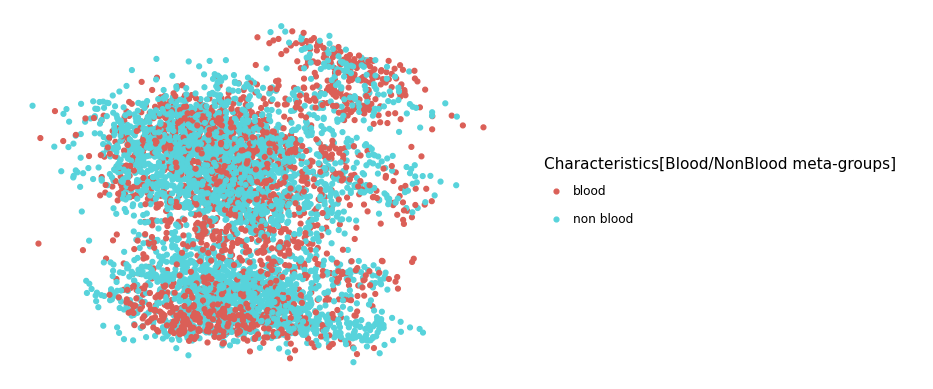

<ggplot: (149084791733)>

In [85]:
ggplot(pcadf, aes(x="PCA 1", y="PCA 2", color = "Characteristics[Blood/NonBlood meta-groups]")) + \
geom_point()

In [87]:
factor = cells["Factor Value[4 meta-groups]"]
pcadf = pcadf.join(factor)

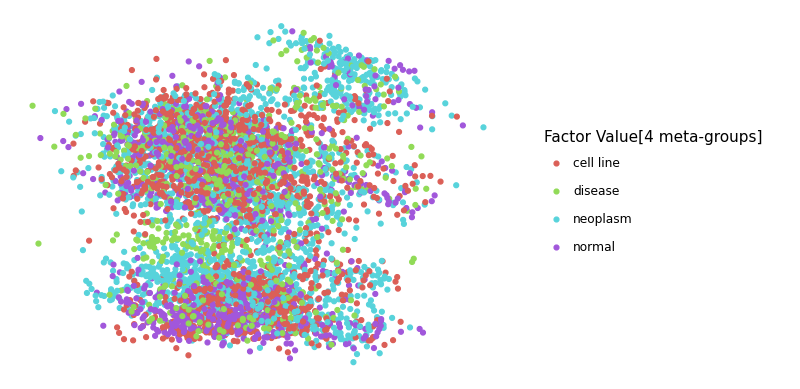

<ggplot: (149084791652)>

In [88]:
ggplot(pcadf, aes(x="PCA 1", y="PCA 2", color = "Factor Value[4 meta-groups]")) + \
geom_point()

Conclusion: This is the plot produced using the data as the last two above it, though this one is colered by a metric of four meta-groups, whether each point is associated with a cell line, disease cells, neoplasm, or a normal cluster of cells. Though all four groups can be found in each of the three groupings previously discussed, there not an even mix within only one of them. Diseased cells, neoplasm, and normal cells dominate the lowest point grouping, and the other has a fairly even mix of all four. These results are probably due to the differences found in breast cancer and compared to ovarian types, however it is unclear which group is associated with which cancer type (Cited from Evan Werner's Lab 4 File)